# Diabetes Analysis - Machine Learning End-to-End Project

This lab is a guided project that will walk you through the process of building a machine learning model to predict whether the progression of diabetes is likely to occur in a patient based on a set of diagnostic measurements. (I'm not a doctor, so I can't tell you what the measurements mean, but you can read more about them [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).)

To a very large extent, this lab follows the module video lectures. If you're stuck at any point, make sure to check out the video lectures for guidance.

**Objectives**
- Practice building a machine learning project from start to finish

**Emojis Legend**
- 👨🏻‍💻 - Instructions; Tells you about something specific you need to do.
- 🦉 - Tips; Will tell you about some hints, tips and best practices
- 📜 - Documentations; provides links to documentations
- 🚩 - Checkpoint; marks a good spot for you to commit your code to git
- 🕵️ - Tester; Don't modify code blocks starting with this emoji

## Setup
First, let's import a few common modules, ensure `MatplotLib` plots figures inline. We also ensure that you have the correct version of Python (3.10) installed.

- **Task 👨🏻‍💻**: Keep coming back to update this cell as you need to import new packages.
- **Task 👨🏻‍💻**: Check what's already been imported here

In [85]:
# Python ≥3.10 is required
import sys
#assert sys.version_info >= (3, 10)

# Common imports
import numpy as np
import pandas as pd
import os


# Scikit Learn imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

# to make this notebook's output stable across runs
np.random.seed(42)

## Diabetes Dataset

### 1️⃣ Ask

This dataset contains several medical predictor variables and one target variable. Predictor Variables include ten baseline variables: age, sex, body mass index, average blood pressure, and six blood serum measurements (more details below) were obtained for each of n = 442 diabetes patients, as well as a quantitative measure of disease progression one year after baseline (target/outcome).

| Attribute | Description                                                                           |
| --------- | ------------------------------------------------------------------------------------- |
| age       | age in years                                                                          |
| sex       | 1 - Male, 2- Female                                                                   |
| bmi       | body mass index                                                                       |
| bp        | average blood pressure                                                                |
| s1        | tc, total serum cholesterol                                                           |
| s2        | ldl, low-density lipoproteins                                                         |
| s3        | hdl, high-density lipoproteins                                                        |
| s4        | tch, total cholesterol / HDL                                                          |
| s5        | ltg, possibly log of serum triglycerides level                                        |
| s6        | glu, blood sugar level                                                                |
| s6        | measure of the disease progression after one year of measuring the baseline variables |

The project objective is to develop a model that can predict the disease progression based on the above variables.


### 2️⃣ Prepare
Here we will load the dataset and split it into training and test sets. We will also perform some Exploratory Data Analysis to get some insights about the processing steps we'll need to take.

**Task 👨🏻‍💻** : Load the dataset from `data/diabetes.csv` and store it in a variable called `diabetes`

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving diabetes.csv to diabetes.csv
User uploaded file "diabetes.csv" with length 18494 bytes


We need to learn about the composition of the dataset. Let's look at the first few rows of the dataset.

**Task 👨🏻‍💻** : Use the `head()` method to look at the first few rows of the dataset.

<details>
  <summary>Output should look like this: (🦉 click me)</summary>
  <img width="600" src="https://github.com/IT4063C/images/raw/main/diabetes-assignment/dataset.png" />
</details>

In [4]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


> 🚩 : Make a git commit here

We need to know the number of rows and columns in the dataset. Let's use the `.shape` attribute to find out.

**Task 👨🏻‍💻:** Use the `.shape` attribute to find out the number of rows and columns in the dataset.

*Hint 🦉 :* 
- `.shape` is an attribute not a method/function; you don't add `()` at the end of it to execute it.
- `.shape` It returns a tuple of the form `(rows, columns)`

In [5]:
diabetes.shape

(442, 11)

We need to check if we have any missing values in the dataset. Let's use the `isnull()` method to find out.

**Task 👨🏻‍💻** : Use the `isnull()` method to find out if there are any missing values in the dataset.

*Hint 🦉 :* 
- `isnull()` returns a dataframe of the same shape as the original dataframe with boolean values. `True` indicates a missing value and `False` indicates a non-missing value.
- because it would be difficult to read a dataframe of boolean values, we can use the `sum()` method to get the total number of missing values in each column. `sum()` returns a series with the column names as the index and the total number of missing values in each column as the values.
  - We've done this in a previous lab, so you can refer to that if you need to.

<details>
  <summary>Output should look like this: (🦉 click me)</summary>
  <img width="100" src="https://github.com/IT4063C/images/raw/main/diabetes-assignment/missing_fields.png" />
</details>


In [6]:
diabetes.isnull()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
437,False,False,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False,False,False
439,False,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False,False,False


We could also use the `info()` method to get a summary of the dataset. Let's use it to find out more about the dataset.

**Task 👨🏻‍💻** : Use the `info()` method to get a summary of the dataset.

*Hint 🦉 :* 
- `info()` returns a summary of the dataset. 
- It includes the number of rows and columns, the number of **non-missing values** in each column, the data type of each column and the memory usage of the dataframe.

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      441 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


We could also use the `describe()` method to get a summary of the dataset. Let's use it to find out more about the dataset.

**Task 👨🏻‍💻** : Use the `describe()` method to get a summary of the dataset.

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      441 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


> 🚩 : Make a git commit here

One of the ways to get a better understanding of the dataset is to look at the distribution of the values in each column. Let's use the `describe()` method to get a summary of the distribution of values in each column.

**Task 👨🏻‍💻** : Use the `.hist()` method to plot a histogram of each column in the dataset.

*Hint 🦉 :* 
- use the `figsize` parameter to set the size of the figure to `(20, 15)`
- use the `bins` parameter to set the number of bins to `50`

<details>
  <summary>Output should look like this: (🦉 click me)</summary>
  <img width="800" src="https://github.com/IT4063C/images/raw/main/diabetes-assignment/diabetes_hist.png" />
</details>

array([[<Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'BP'}>, <Axes: title={'center': 'S1'}>,
        <Axes: title={'center': 'S2'}>],
       [<Axes: title={'center': 'S3'}>, <Axes: title={'center': 'S4'}>,
        <Axes: title={'center': 'S5'}>],
       [<Axes: title={'center': 'S6'}>, <Axes: title={'center': 'Y'}>,
        <Axes: >]], dtype=object)

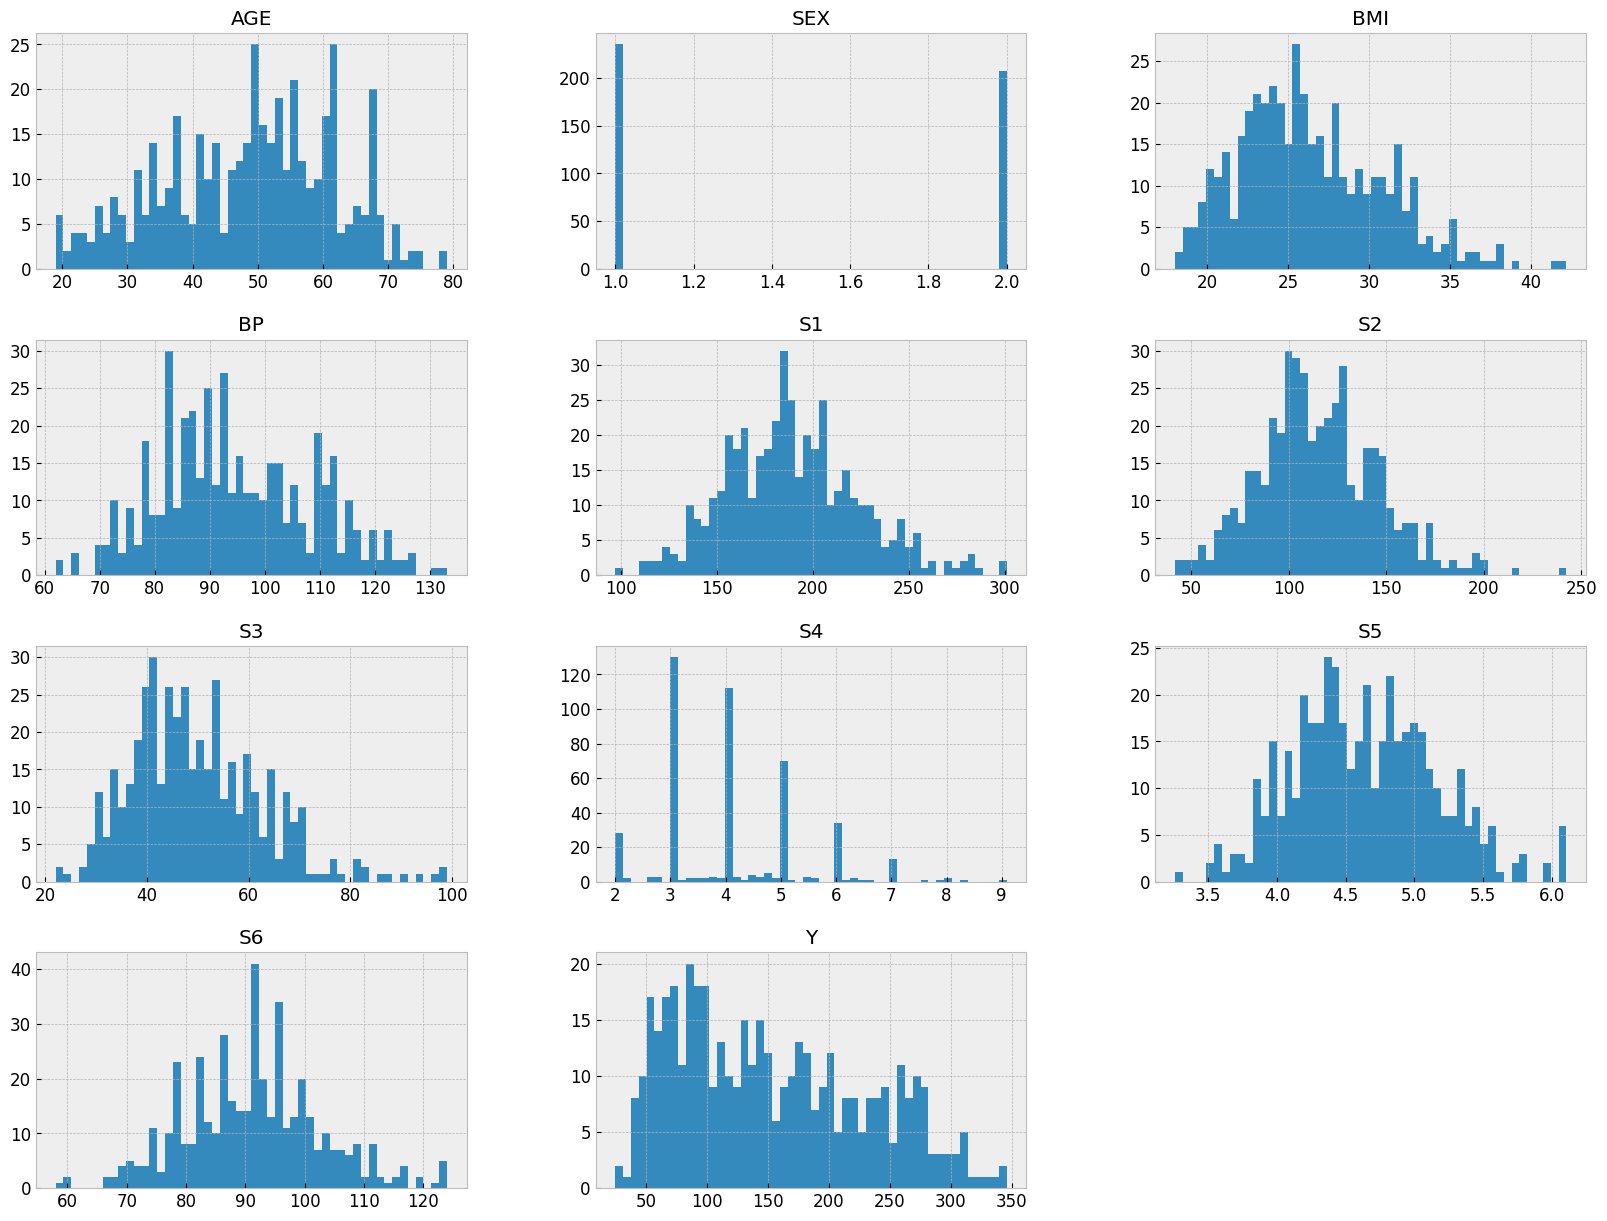

In [9]:
diabetes.hist(figsize=(20, 15), bins=50)

> 🚩 : Make a git commit here

#### ☕️ Coffee Break
Here are some observations we can make from the what we've done so far (usually I would ask you to make these observations):
- The dataset has 442 rows and 11 columns. 
  - n = 422
  - m = 10
  - outcome/target = 1
- There are is a single missing feature for a single row in the dataset. (I purposefully removed it from the dataset so we can practice imputing missing values)
- the `SEX` column has only two unique values: 1 and 2. This means that the column is categorical and not numerical.
  - We will need to replace the values with `MALE` and `FEMALE` instead of `1` and `2`.
  - We will need to use the `OneHotEncoder` to encode this column.
- The values in each column are on a different scales. Some ranging from 20 to 80, others from 100 to 400, and so on. We will need to scale the values before we can use them to train a machine learning model.


#### EDA
Let's perform some more data exploration. Let's visualize the relationship between the features and the target.

**Task 👨🏻‍💻** : Use the `scatter_matrix()` method from the `pandas.plotting` module to plot a scatter plot of each column in the dataset against the target column.

<details>
  <summary>Output should look like this: (🦉 click me)</summary>
  <img width="600" src="https://github.com/IT4063C/images/raw/main/diabetes-assignment/scatter_matrix.png" />
</details>

ValueError: ignored

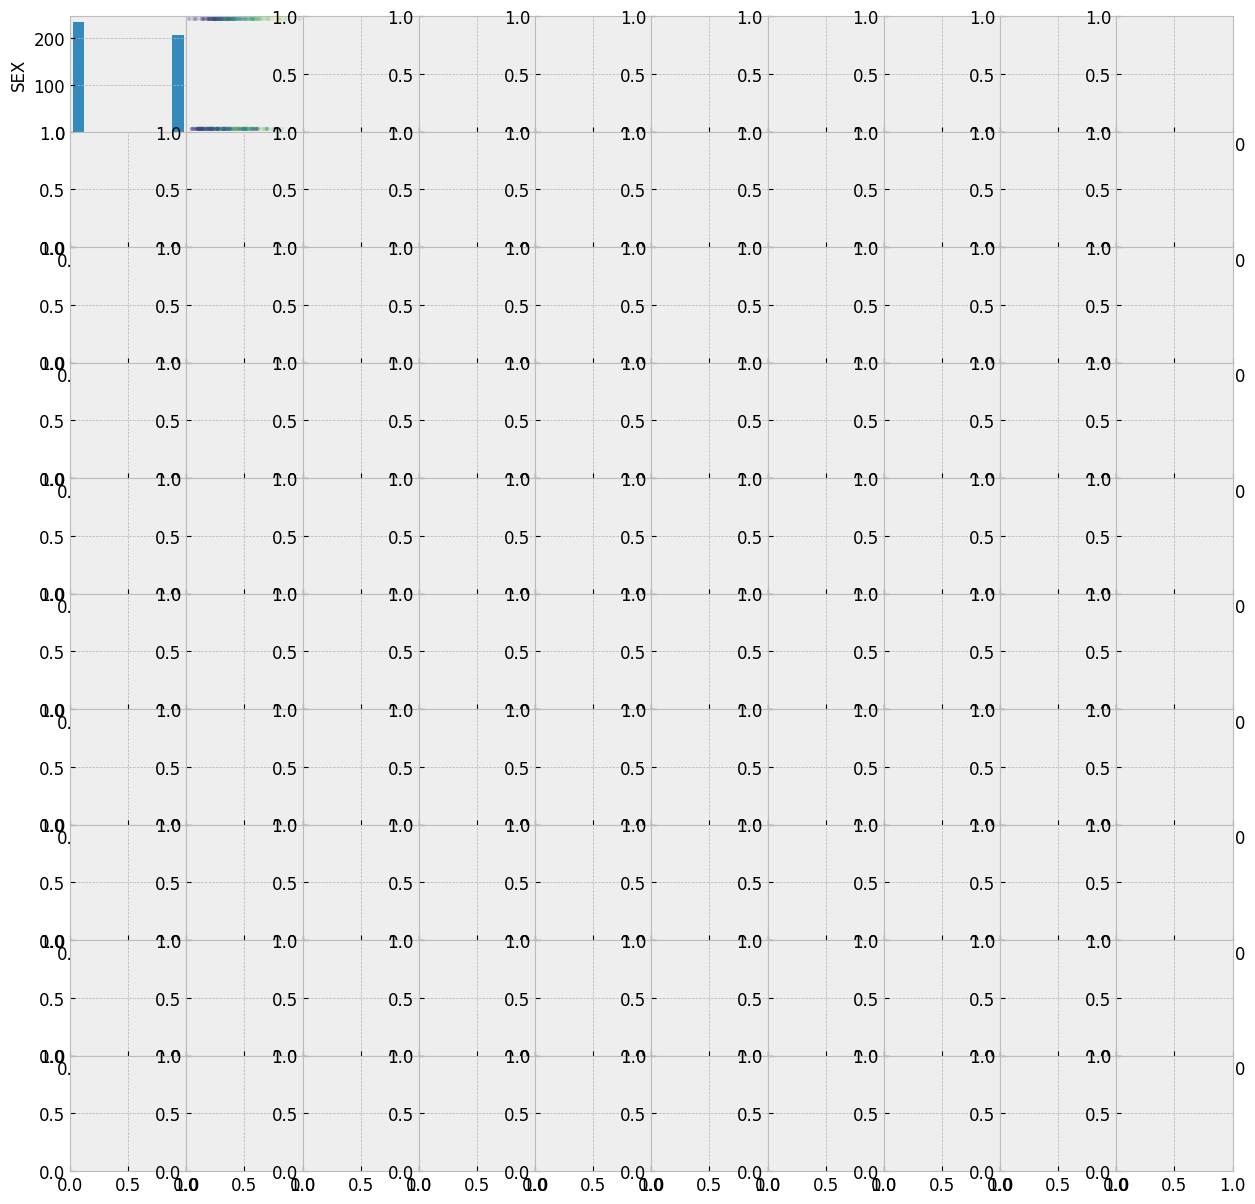

In [12]:
# select the target column
target_col = 'Y'

# drop the header or index from the DataFrame
diabetes_df = diabetes.drop(diabetes.columns[0], axis=1)

# create a scatter plot matrix of all columns against the target column
pd.plotting.scatter_matrix(diabetes_df, alpha=0.2, figsize=(15, 15), diagonal='hist', c=diabetes_df[target_col], cmap='viridis')

# add a color bar to the scatter plot matrix
plt.colorbar()

> 🚩 : Make a git commit here

**✨ Extra Credit Task 👨🏻‍💻**: <u>For 1 point of Extra Credit:</u> plot the same chart again but this time without the `SEX` column.

<details>
  <summary>Output should look like this: (🦉 click me)</summary>
  <img width="600" src="https://github.com/IT4063C/images/raw/main/diabetes-assignment/scatter_matrix_no_sex.png" />
</details>

> 🚩 : Make a git commit here

Let's explore the correlation between the target variable and the the input features

**Task 👨🏻‍💻** : Use the `corr()` method to print out the correlation matrix for the `Y` column in this dataset. Sort the values in descending order.

<details>
  <summary>Output should look like this: (🦉 click me)</summary>
  <img width="150" src="https://github.com/IT4063C/images/raw/main/diabetes-assignment/Y_corr.png" />
</details>

In [13]:
# select the target column
target_col = 'Y'

# calculate the correlation matrix for the target column
corr_matrix = diabetes.corr()[target_col]

# sort the values in descending order
sorted_corr_matrix = corr_matrix.sort_values(ascending=False)

# print the correlation matrix
print(sorted_corr_matrix)

Y      1.000000
BMI    0.586450
S5     0.565883
BP     0.441713
S4     0.430453
S6     0.382483
S1     0.212022
AGE    0.187889
S2     0.174054
SEX    0.043062
S3    -0.394789
Name: Y, dtype: float64


> 🚩 : Make a git commit here

**Task 👨🏻‍💻** : what are the top 3 features that are most correlated with the target column? **ANSWER IS HERE THE MOST CORRELATED WOULD BE THE BMI, S5 and BP**

> 🚩 : Make a git commit here

**✨ Extra Credit Task 👨🏻‍💻**: 
<u>For 5 Extra Credit Points:</u> Plot the correlation matrix using a heatmap. You can use the `seaborn` module to do this. You can refer to the [documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html) for more information.

*Hint 🦉 :* 
- use the correlation matrix generated in the previous step to generate the heatmap.
- use the `coolwarm` color map to get a similar color scheme to the example.

<details>
  <summary>Output should look like this: (🦉 click me)</summary>
  <img width="600" src="https://github.com/IT4063C/images/raw/main/diabetes-assignment/corr_heatmap.png" />
</details>

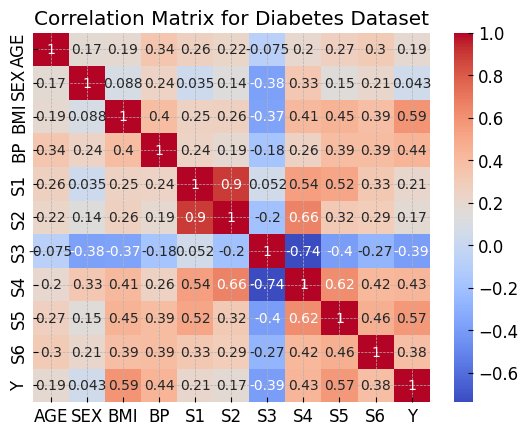

In [14]:
# select the target column
target_col = 'Y'

# calculate the correlation matrix for the target column
corr_matrix = diabetes.corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# set the title of the plot
plt.title('Correlation Matrix for Diabetes Dataset')

# show the plot
plt.show()

> 🚩 : Make a git commit here

#### Split the dataset into training and test sets
Now before we go any further, we need to split the dataset we have into two parts:
- a training set
- a test set

This step is important because we need to train our model, then test it against some data that it hasn't seen before. If we don't do this, we won't be able to tell if our model is overfitting or not.

**Task 👨🏻‍💻** : Use the `train_test_split()` function from the `sklearn.model_selection` package to split the dataset into a training set named `random_train_set` and a test set and `random_test_set`.

*Hint 🦉 :* 
- use the `random_state` parameter to set the random seed to `42` - this will ensure that we get the same results every time we run the code.
- use the `test_size` parameter to set the size of the test set to `0.2`; the test set is 20% of the size of the dataset.

In [16]:
# split the dataset into training and test sets
random_train_set, random_test_set = train_test_split(diabetes, test_size=0.2, random_state=42)

# print the shapes of the training and test sets
print(f'Training set shape: {random_train_set.shape}')
print(f'Test set shape: {random_test_set.shape}')


Training set shape: (353, 11)
Test set shape: (89, 11)


> 🚩 : Make a git commit here

Now as mentioned in the lectures, a random split of the data may cause issues of bias. Where one subset of the data maybe overly represented in the training set. This leads misrepresenting model of the data. 

To avoid this, we can use stratified sampling to ensure that the training set and test set are representative of the original dataset. Usually, a Subject Matter Expert (SME) would be able to tell us which column to use for stratified sampling. 

In this case, we will use the `SEX` column.

**Task 👨🏻‍💻** : Use the `StratifiedShuffleSplit()` function from the `sklearn.model_selection` package to split the dataset into a training set named `sex_strat_train_set` and a test set and `sex_strat_test_set`. Split the data on the `SEX` column.

*Hint 🦉 :*
- use the `random_state` parameter to set the random seed to `42` - this will ensure that we get the same results every time we run the code. it will also ensure you get similar values to the ones in the screenshots provided in this assignment.
- use the `test_size` parameter to set the size of the test set to `0.2`; the test set is 20% of the size of the dataset.

In [18]:
# create an instance of StratifiedShuffleSplit
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# split the dataset into training and test sets based on the SEX column
for sex_train_index, sex_test_index in strat_split.split(diabetes, diabetes['SEX']):
    sex_strat_train_set = diabetes.loc[sex_train_index]
    sex_strat_test_set = diabetes.loc[sex_test_index]

# print the shapes of the training and test sets
print(f'Training set shape: {sex_strat_train_set.shape}')
print(f'Test set shape: {sex_strat_test_set.shape}')

Training set shape: (353, 11)
Test set shape: (89, 11)


> 🚩 : Make a git commit here

The `SEX` column was an okay choice to stratify the sampling on. However, we can also try to use the `AGE` column. However, we'll need to introduce a categorical representation of the `AGE` column by binning the values into different age groups.

**Task 👨🏻‍💻** : Create a new column called `AGE_CAT` and bin the values in the `AGE` column into the following categories:
- 10 - 30
- 30 - 50
- 50 - 70
- 70 - 90

*Hint 🦉 :* 
- Use the `pd.cut()` function to bin the values in the `AGE` column into the categories above.

In [19]:
# define the bins for the age categories
bins = [10, 30, 50, 70, 90]

# define the labels for the age categories
labels = ['10-30', '30-50', '50-70', '70-90']

# use pd.cut() to bin the values in the AGE column into the categories above
diabetes['AGE_CAT'] = pd.cut(diabetes['AGE'], bins=bins, labels=labels, include_lowest=True)

# print the first five rows of the dataset to confirm the new column has been created
print(diabetes.head())

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y AGE_CAT
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151   50-70
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75   30-50
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141   70-90
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206   10-30
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135   30-50


show the distribution of the values in the `AGE_CAT` column. using the `hist()` method to show a diagram of the distribution of the values in the `AGE_CAT` column.

<details>
  <summary>Output should look like this: (🦉 click me)</summary>
  <img width="600" src="https://github.com/IT4063C/images/raw/main/diabetes-assignment/age_cat_hist.png" />
</details>

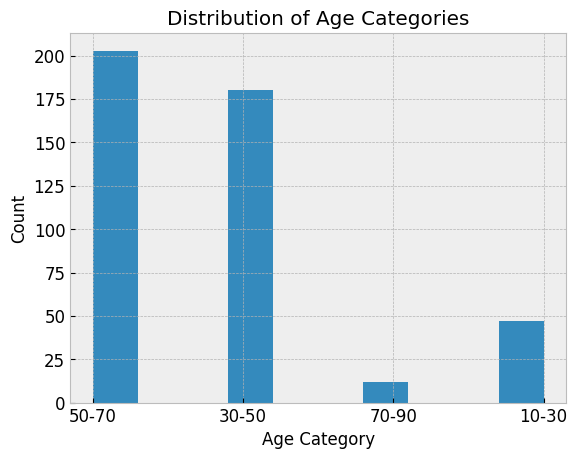

In [20]:
# use the hist() method to show a histogram of the distribution of the values in the AGE_CAT column
diabetes['AGE_CAT'].hist()

# set the x-axis label
plt.xlabel('Age Category')

# set the y-axis label
plt.ylabel('Count')

# set the title of the plot
plt.title('Distribution of Age Categories')

# display the plot
plt.show()

**Task 👨🏻‍💻** : Use the `StratifiedShuffleSplit()` function from the `sklearn.model_selection` package to split the dataset into a training set named `age_sex_strat_train_set` and a test set and `age_sex_strat_test_set`. Split the data on the `AGE_CAT` column.

*Hint 🦉 :*
- use the `random_state` parameter to set the random seed to `42` - this will ensure that we get the same results every time we run the code. it will also ensure you get similar values to the ones in the screenshots provided in this assignment.
- use the `test_size` parameter to set the size of the test set to `0.2`; the test set is 20% of the size of the dataset.

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(diabetes, diabetes["AGE_CAT"]):
    age_sex_strat_train_set = diabetes.loc[train_index]
    age_sex_strat_test_set = diabetes.loc[test_index]

> 🚩 : Make a git commit here

We will use the age-split sets for the rest of the lab. But we need to remember to drop the `AGE_CAT` column from the training set and test set.

*Note 🦉:* This doesn't mean that splitting the data by the `SEX` column is wrong. It all depends on the problem you're trying to solve and the data you have. This is usually guided by the Subject Matter Expert (SME).

**Task 👨🏻‍💻** : Drop the `AGE_CAT` column from the training set and test set.

*Hint 🦉 :* 
- use the `drop()` method to drop the `AGE_CAT` column from the training set and test set.
- you'll need to call it twice, once for the training set `age_sex_strat_train_set` and once for the test set `age_sex_strat_test_set`.
- You can use the `inplace` parameter to drop the column in place.

In [22]:
age_sex_strat_train_set.drop("AGE_CAT", axis=1, inplace=True)
age_sex_strat_test_set.drop("AGE_CAT", axis=1, inplace=True)

> 🚩 : Make a git commit here

#### Separate the features and labels
Let's separate the features `X` from the labels `y`. We'll use the training set for this.

**Task 👨🏻‍💻** : Create a copy of the training set <u>without</u> the output `y` and store it in a variable called `diabetes_X`, and create a copy of the dataset with <u>Only</u> the column `Y` and name it `diabetes_y`.

In [23]:
diabetes_X = age_sex_strat_train_set.drop("Y", axis=1).copy()
diabetes_y = age_sex_strat_train_set["Y"].copy()

<details>
  <summary>Running the following cell, should produce an output that looks like this: (🦉 click me)</summary>
  <img width="600" src="https://github.com/IT4063C/images/raw/main/diabetes-assignment/prepare-done1.png" />
  <br />
  <strong>OR</strong>
  <br />
  <img width="600" src="https://github.com/IT4063C/images/raw/main/diabetes-assignment/prepare-done2.png" />
</details>

In [24]:
display(diabetes_X.head())
display(diabetes_y.head())

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
435,45,1,24.2,83.00,177,118.4,45.0,4.00,4.2195,82
300,53,1,33.2,82.67,186,106.8,46.0,4.04,5.1120,102
196,42,1,22.1,85.00,213,138.6,60.0,4.00,4.2767,94
169,48,1,23.9,109.00,232,105.2,37.0,6.00,6.1070,96
46,33,1,25.3,85.00,155,85.0,51.0,3.00,4.5539,70


435     64
300    275
196     72
169    152
46     190
Name: Y, dtype: int64

> 🚩 : Make a git commit here

### 🏖 ☕️ Take a break here
make sure you understand what we've done so far.

### 3️⃣ Process
In this section, we'll process and clean it in preparation for the model creation and analysis work the data. 

Here are some of what we will do:
- impute missing values (numerical data)
- scale numerical features (numerical data)
- encode categorical features (categorical data)
- combining features into new features

We will also compose all of these steps into a single pipeline.

Let's start doing them individually.

#### Impute Missing Values
We'll use the `SimpleImputer` class from the `sklearn.impute` package to impute the missing values in the dataset. I, purposefully, removed some values from the dataset so that we can practice imputing missing values.

Keep in mind, even if there was no missing values in the dataset, we would still need to implement the imputer. Why? Because we need to make sure that our processing pipeline can be applied to new data that <u>may</u> have missing values.

Since the imputer applies to <u>numerical</u> features, we'll need to create a copy of the dataset with only the numerical features, and another with only the categorical features.

**Task 👨🏻‍💻** : Create a copy of the dataset with only the numerical features and name it `diabetes_X_num`. Create another copy of the dataset with only the categorical features and name it `diabetes_X_cat`. 

*Hint:*
- MAKE SURE you start with the diabetes_X dataframe that we created earlier. not the full dataset.

In [34]:
# create a copy of diabetes_X with only numerical features
diabetes_X_num = diabetes_X.select_dtypes(include=[np.number])
#diabetes_X['SEX'] = diabetes_X['SEX'].astype('category')
# create a copy of diabetes_X with only categorical features
diabetes_X_cat = diabetes_X.select_dtypes(include='category')


<details>
  <summary>Running the following cell, should produce an output that looks like this: (🦉 click me)</summary>
  <img width="600" src="https://github.com/IT4063C/images/raw/main/diabetes-assignment/num-cat.png" />
</details>

In [35]:
display(diabetes_X_num.head())
display(diabetes_X_cat.head())

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6
435,45,24.2,83.00,177,118.4,45.0,4.00,4.2195,82
300,53,33.2,82.67,186,106.8,46.0,4.04,5.1120,102
196,42,22.1,85.00,213,138.6,60.0,4.00,4.2767,94
169,48,23.9,109.00,232,105.2,37.0,6.00,6.1070,96
46,33,25.3,85.00,155,85.0,51.0,3.00,4.5539,70


,SEX
435,1
300,1
196,1
169,1
46,1


> 🚩 : Make a git commit here

**Task 👨🏻‍💻** : Create an instance of the `SimpleImputer` class and name it `imputer`. Use the `mean` value as the imputer strategy.

*Hint 🦉 :* 
- use the `diabetes_X_num` dataframe to create the imputer.
- set the `strategy` parameter to `mean`
- name the transformed dataset `diabetes_X_num_imputed`

In [36]:

# Create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='mean')

# Use the imputer to fill in missing values in the numerical features
diabetes_X_num_imputed = imputer.fit_transform(diabetes_X_num)

Keep in mind, all the `sklearn` transforms return a numpy array. if you want to print the data such that we can see them with the column names as we're used to in `pandas`, we need to convert that back to a DataFrame.

<details>
  <summary>Output should look like this: (🦉 click me)</summary>
  <img width="600" src="https://github.com/IT4063C/images/raw/main/diabetes-assignment/data-imputed.png" />
</details>

In [38]:
# assuming the imputer has been fitted and transformed and the result is stored in X
diabetes_X_num_imputed = pd.DataFrame(diabetes_X_num_imputed, columns=diabetes_X_num.columns, index=diabetes_X_num.index)
diabetes_X_num_imputed.head()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6
435,45.0,24.2,83.00,177.0,118.4,45.0,4.00,4.2195,82.0
300,53.0,33.2,82.67,186.0,106.8,46.0,4.04,5.1120,102.0
196,42.0,22.1,85.00,213.0,138.6,60.0,4.00,4.2767,94.0
169,48.0,23.9,109.00,232.0,105.2,37.0,6.00,6.1070,96.0
46,33.0,25.3,85.00,155.0,85.0,51.0,3.00,4.5539,70.0


> 🚩 : Make a git commit here

#### Scaling and Normalizing Numerical Features
<img width="500" src="https://github.com/IT4063C/images/raw/main/diabetes-assignment/diabetes_hist.png" />

As you can see from the histograms and the `describe()` output (if you do it), the values in each column are on different scales. This leads the machine learning algorithms giving more weight to the features. We need to scale the values in each column to the same scale. 

**Task 👨🏻‍💻** : use the `StandardScaler` class to transform/scale the values in each column to the same scale.

*Hint 🦉 :* 
- name the transformed data `diabetes_X_num_scaled`
- make sure you use the `diabetes_X_num_imputed` as input to the scaler

In [39]:

scaler = StandardScaler()
diabetes_X_num_scaled = scaler.fit_transform(diabetes_X_num_imputed)

Similar to we've done above after the imputer, we need to convert the numpy array to a DataFrame.

**Task 👨🏻‍💻** convert the numpy array `diabetes_X_num_scaled` back to a pandas DataFrame. 

*Hint 🦉 :* Look above 

In [43]:
diabetes_X_num_scaled = pd.DataFrame(diabetes_X_num_scaled, columns=diabetes_X_num.columns)


**Task 👨🏻‍💻** : print the first 5 records of the  use the `diabetes_X_num_scaled`

<details>
  <summary>Output should look like this: (🦉 click me)</summary>
  <img width="600" src="https://github.com/IT4063C/images/raw/main/diabetes-assignment/data-scaled.png" />
</details>


In [44]:
diabetes_X_num_scaled.head()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6
0,-0.266365,-0.478219,-0.838821,-0.333170,0.110944,-0.387616,-0.029781,-0.773674,-0.766011
1,0.346686,1.568807,-0.862660,-0.076257,-0.271298,-0.310508,0.001600,0.919461,0.927706
2,-0.496259,-0.955859,-0.694342,0.694481,0.776572,0.769006,-0.029781,-0.665161,0.250219
3,-0.036470,-0.546454,1.039404,1.236853,-0.324021,-1.004481,1.539266,2.807046,0.419591
4,-1.185941,-0.228027,-0.694342,-0.961179,-0.989649,0.075033,-0.814304,-0.139293,-1.782242


> 🚩 : Make a git commit here

#### Encode Categorical Features
Let's now process and transform the categorical features. In the videos we mentioned 2 types of categorical feature encoders: `OrdinalEncoder` and `OneHotEncoder`. We'll use the `OneHotEncoder` to encode the categorical features in the dataset.

**Task 👨🏻‍💻** : Why don't we use the `OrdinalEncoder` to encode the categorical features in the dataset? **ANSWER: The OrdinalEncoder is a useful tool for encoding categorical features when the categories have an inherent order or ranking, such as low, medium, and high. However, in our diabetes dataset, the categorical feature SEX only has two possible values: 0 and 1. These values do not have any inherent order or ranking, so it would not make sense to use the OrdinalEncoder. Instead, we use the OneHotEncoder to create binary features for each category.**


> 🚩 : Make a git commit here

Let's see how many records exist for each category in the `SEX` column.

In [45]:
diabetes_X_cat['SEX'].value_counts()

1    188
2    165
Name: SEX, dtype: int64

If we encode the data with the current values, the category names would be `1` and `2`.

Let's change the values to `male` and `female`.

**Task 👨🏻‍💻** : Use the `replace()` method to replace the values in the `SEX` column with `male` and `female`. 

(done for you; make sure you understand what's happening)

In [46]:
diabetes_X_cat['SEX'].replace({1: 'MALE', 2: 'FEMALE'}, inplace=True)
display(diabetes_X_cat.head())

,SEX
435,MALE
300,MALE
196,MALE
169,MALE
46,MALE


> 🚩 : Make a git commit here

**Task 👨🏻‍💻** : Encode the `SEX` column using the `OneHotEncoder` class. and print the `categories_` attribute of the encoder.

*Hint 🦉 :* 
- Create an instance of the `OneHotEncoder` class and name it `cat_encoder`.
- use the `diabetes_X_cat` dataframe to `fit` the encoder.
- the results of this transformation will be a scipy sparse matrix. this is a more memory efficient way of storing the data. (reference the lecture videos for more info)

<details>
  <summary>Output should look like this: (🦉 click me)</summary>
  <img width="400" src="https://github.com/IT4063C/images/raw/main/diabetes-assignment/encoder-cats.png" />
</details>

In [50]:
cat_encoder = OneHotEncoder()
diabetes_X_cat_encoded = cat_encoder.fit_transform(diabetes_X_cat)
print(cat_encoder.categories_)

[array(['FEMALE', 'MALE'], dtype=object)]


> 🚩 : Make a git commit here

#### Pipelines
We've seen how to process the data in individual steps. But we need to combine all the steps into a single pipeline. This will make it easier to apply the same transformations to the test set, to new data, and to any other data that we may have in the future.

We'll start by creating a pipeline for the numerical features. The numerical pipeline will impute the missing values, and scale the values.

**Task 👨🏻‍💻** : Create a pipeline for the numerical features that will impute the missing values, and scale the values in each column to the same scale. Name the pipeline `num_pipeline`.

In [54]:


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('scaler', StandardScaler()),
    ])


> 🚩 : Make a git commit here

**Task 👨🏻‍💻** : Create a pipeline for the categorical features that will encode categorical columns using the `OneHotEncoder` Transformer. Name the pipeline `cat_pipeline`.

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values
cat_attribs = ["SEX"]


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ('cat_selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
])



> 🚩 : Make a git commit here

To combine the numerical and categorical pipelines, we'll use the `ColumnTransformer` class from the `sklearn.compose` package. This ColumnTransformer allows us to apply different transformation pipelines to different columns.

**Task 👨🏻‍💻** : Create a `ColumnTransformer` that will apply the `num_pipeline` to the numerical columns, and the `cat_pipeline` to the categorical columns. Name the ColumnTransformer `full_pipeline`.

*Hint 🦉 :* 
- create 2 lists/arrays of the column names for each subset. one for the numerical columns, and one for the categorical columns.
- name the transformed dataset `diabetes_X_prepared`

In [62]:

num_attribs = list(diabetes_X_num)
cat_attribs = ["SEX"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

diabetes_X_prepared = full_pipeline.fit_transform(diabetes)


> 🚩 : Make a git commit here

Again, any output of the `sklearn` transforms is a numpy array. If we want to get the first 5 records of the transformed dataset, we need to do the following:

<details>
  <summary>Output should look like this: (🦉 click me)</summary>
  <img width="600" src="https://github.com/IT4063C/images/raw/main/diabetes-assignment/prepared-numpy.png" />
</details>

In [65]:
diabetes_X_prepared[:5]

array([[ 0.80050009,  1.29708846,  0.45942524, -0.92974581, -0.73206462,
        -0.91245053, -0.05449919,  0.41853093, -0.37098854,  0.        ,
         1.        ],
       [-0.03956713, -1.08218016, -0.5539621 , -0.17762425, -0.40288615,
         1.56441355, -0.83030083, -1.43658851, -1.93847913,  1.        ,
         0.        ],
       [ 1.79330681,  0.93453324, -0.11965324, -0.95867356, -0.71889748,
        -0.68024452, -0.05449919,  0.06015558, -0.54515416,  0.        ,
         1.        ],
       [-1.87244107, -0.24377122, -0.77111652,  0.25629203,  0.52539714,
        -0.75764652,  0.72130245,  0.47698252, -0.19682291,  1.        ,
         0.        ],
       [ 0.11317236, -0.76494435,  0.45942524,  0.08272552,  0.32789006,
         0.17117751, -0.05449919, -0.67250161, -0.98056821,  1.        ,
         0.        ]])

if we want to convert the numpy array to a DataFrame, we can do the following:

- note: the column names are not in the same order as the original dataset. this is because the `OneHotEncoder` class returns the encoded columns in alphabetical order.

In [66]:
# Converting the numpy array to a pandas dataframe
# Convert the sparse matrix to a DataFrame
diabetes_X_cat_encoded_df = pd.DataFrame(diabetes_X_cat_encoded.toarray(),
                                         columns=cat_encoder.get_feature_names(cat_attribs))

# Make sure both DataFrames have the same index
diabetes_X_num.index = diabetes_X_cat_encoded_df.index

# Concatenate the two DataFrames
diabetes_X_prepared = pd.concat([diabetes_X_num, diabetes_X_cat_encoded_df], axis=1)


AttributeError: ignored

**For 5 Extra Credit Points:**
- Create a custom transformer that would a new feature that is the ratio of the `BMI` to the `AGE`. Add this transformer to the `full_pipeline` and make sure it works.

> 🚩 : Make a git commit here (if you've done the extra credit)

🏖 ☕️ Take a break here and make sure you understand what we've done so far.

### 4️⃣ Analyze
In this section, we'll train 2 machine learning models to make predictions about the diabetes progression after 1 year, given a number of predictors.

At this stage we should have the following 4 datasets:
- `diabetes_X_prepared` - the inputs for the training set
- `diabetes_y` - the outputs for the training set
- `age_sex_strat_test_set` - the test set (both X and y)

In [ ]:
# ⛔️ Do not uncomment this cell. This is what I used to save a copy of the prepared data to csv files.

# diabetes_X_prepared.to_csv('data/train_X_prepared.csv', index=False)
# diabetes_y.to_csv('data/trainy.csv', index=False)

# age_sex_strat_test_set.to_csv('data/test_X_y.csv', index=False)

Now in case you didn't get the prepare and process steps right, you can use the `diabetes_X_prepared` and `diabetes_y` datasets that I've created for you.

uncomment the following cell and execute it.

In [67]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train_X_prepared.csv to train_X_prepared.csv
User uploaded file "train_X_prepared.csv" with length 65368 bytes


In [68]:
diabetes_X_prepared = pd.read_csv("train_X_prepared.csv")



In [69]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train_y.csv to train_y.csv
User uploaded file "train_y.csv" with length 1290 bytes


In [70]:
diabetes_y = pd.read_csv("train_y.csv")


In [71]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test_X_y.csv to test_X_y.csv
User uploaded file "test_X_y.csv" with length 4319 bytes


In [72]:
age_sex_strat_test_set = pd.read_csv("test_X_y.csv")

Let's build our linear regression model. We'll use the `LinearRegression` class from the `sklearn.linear_model` package.

**Task 👨🏻‍💻** : Create an instance of the `LinearRegression` class and name it `lin_reg`.

*Hint*:
- the input is the `diabetes_X_prepared` dataset, the output is the `diabetes_y` dataset

In [84]:
from sklearn.linear_model import LinearRegression

# create an instance of the LinearRegression class
lin_reg = LinearRegression()

# fit the model to the data
lin_reg.fit(diabetes_X_prepared, diabetes_y)
#diabetes_X_prepared.head()


,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,FEMALE,MALE
0,-0.266365,-0.478219,-0.838821,-0.333170,0.110944,-0.387616,-0.029781,-0.773674,-0.766011,1.0,0.0
1,0.346686,1.568807,-0.862660,-0.076257,-0.271298,-0.310508,0.001600,0.919461,0.927706,1.0,0.0
2,-0.496259,-0.955859,-0.694342,0.694481,0.776572,0.769006,-0.029781,-0.665161,0.250219,1.0,0.0
3,-0.036470,-0.546454,1.039404,1.236853,-0.324021,-1.004481,1.539266,2.807046,0.419591,1.0,0.0
4,-1.185941,-0.228027,-0.694342,-0.961179,-0.989649,0.075033,-0.814304,-0.139293,-1.782242,1.0,0.0


to test how well the model did, we'll calculate the RMSE on the training set

In [90]:
from sklearn.metrics import mean_squared_error
import numpy as np

# predict on the training set
y_pred = lin_reg.predict(diabetes_X_prepared)

# calculate RMSE
test_lin_rmse = np.sqrt(mean_squared_error(diabetes_y, y_pred))

print("RMSE on training set:", test_lin_rmse)


RMSE on training set: 53.63500319865106


> 🚩 : Make a git commit here

Let's create a polynomial regression model. We'll use the `PolynomialFeatures` class from the `sklearn.preprocessing` package to create a new dataset with the polynomial features.

**Task 👨🏻‍💻** : 
- Create an instance of the `PolynomialFeatures` class and name it `poly_features`. Set the `degree` parameter to `2`.
- Create a new linear regression model and name it `poly_reg` and train it using the `poly_features`.

*Hint*:
- you can do this in 2 steps, or you can build a pipeline that will do both steps in one go.

In [86]:

# create a pipeline for preprocessing the data
preprocessing_pipeline = make_column_transformer(
    (PolynomialFeatures(degree=2), slice(0, -1)),
    remainder='passthrough'
)



# create a linear regression model
linear_reg = LinearRegression()

# create a pipeline that combines the preprocessing and the model
model_pipeline = make_pipeline(preprocessing_pipeline, linear_reg)

# fit the model to the training data
model_pipeline.fit(diabetes_X_prepared, diabetes_y)

# make predictions on the training set
y_pred = model_pipeline.predict(diabetes_X_prepared)



to test how well the model did, we'll calculate the RMSE on the training set

In [89]:
# calculate RMSE
test_poly_rmse = np.sqrt(mean_squared_error(diabetes_y, y_pred))

print("RMSE on training set:", test_poly_rmse)

RMSE on training set: 47.135272102995174


> 🚩 : Make a git commit here

Given the following features, predict the diabetes progression after 1 year (Y) using the linear regression and polynomial regression models.

Features:
- Age:50
- Sex: female (2)
- BMI: 26.2
- BP: 97
- S1: 186
- S2: 105.4
- S3: 49
- S4: 4
- S5: 5.0626
- S6: 88

**Task 👨🏻‍💻** : Given the above features, predict the diabetes progression after 1 year (Y) using the linear regression and polynomial regression models.

*Hint 🦉 :* 
 - you'll need to create a list/array/DataFrame with the above features.
 - you will need to transform that input using the `full_pipeline` before passing it to the model.
 - you can use the `predict()` method to make predictions
   - linear regression model gives a prediction of 165.07515659
   - polynomial regression model gives a prediction of 156.5625
 - At this point, the model is trained, and the processing pipelines are trained. Make sure you don't re-train the model again with the input.
   - in other words, you should only use `transform()` calls not the `fit_transform()` and certainly not the `fit()`.

In [88]:
import numpy as np

# Create a numpy array with the given features
features = np.array([[50, 26.2, 97, 186, 105.4, 49, 4, 5.0626, 88,1.0,0.0]])

# Make prediction using the linear regression model
linear_regression_prediction = lin_reg.predict(features)

# Make prediction using the polynomial regression model
polynomial_regression_prediction = model_pipeline.predict(features)

print("Linear regression prediction:", linear_regression_prediction)
print("Polynomial regression prediction:", polynomial_regression_prediction)


Linear regression prediction: [[-841.06507572]]
Polynomial regression prediction: [[1996709.73577691]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


> 🚩 : Make a git commit here

## Evaluate against the test set
Let's evaluate the models using the test set.

**Task 👨🏻‍💻** : Calculate the RMSE on the test set for the linear regression model **AND** the polynomial regression model.

*Hint*:
- remember to separate the X and y from the test set
- remember to transform the X using the `full_pipeline`
- I left some print statements. You don't need to change them. Use their output to answer the questions below.

In [82]:
from sklearn.metrics import mean_squared_error
import numpy as np

# separate X and y from the test set
X_test = age_sex_strat_test_set.drop('Y', axis=1)
y_test = age_sex_strat_test_set['Y']

# transform X_test using the full_pipeline
X_test_transformed = full_pipeline.transform(X_test)

# calculate RMSE for linear regression model
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test_transformed)))
print("Linear regression RMSE:", lin_rmse)

# calculate RMSE for polynomial regression model
poly_rmse = np.sqrt(mean_squared_error(y_test, model_pipeline.predict(X_test_transformed)))
print("Polynomial regression RMSE:", poly_rmse)


Linear regression RMSE: 53.712857927746036
Polynomial regression RMSE: 67.7047882987392


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [91]:
# Don't modify the code below this line
print("-----------------------------------------------------------------")
print(f"Linear Regression RMSE on the training set: {lin_rmse}")
print(f"Linear Regression RMSE on the test set: {test_lin_rmse}")
print("-----------------------------------------------------------------")
print(f"Polynomial Regression RMSE on the training set: {poly_rmse}")
print(f"Polynomial Regression RMSE on the test set: {test_poly_rmse}")
print("-----------------------------------------------------------------")

-----------------------------------------------------------------


NameError: ignored

> 🚩 : Make a git commit here

**Task 👨🏻‍💻** :Comparing the RMSE values for the linear Regression and polynomial regression models on the training and test sets, which model performed better?

Here's the output I received. You should get similar results.

| Model                 | RMSE on Training Set | RMSE on Test Set  |
| --------------------- | -------------------- | ----------------- |
| Linear Regression     | 53.63500319865106    | 53.11536987833757 |
| Polynomial Regression | 47.80449635259552    | 54.2584162004519  |

> 🚩 : Make a git commit here

## Wrap up
- **Task 👨🏻‍💻** : Remember to update the self reflection and self evaluations on the `README` file.
- **Task 👨🏻‍💻** : Make sure you run the following cell. It converts this Jupyter notebook to a Python script. This allows me to provide feedback on your code.


In [92]:
!jupyter nbconvert --to python diabetes-analysis.ipynb

[NbConvertApp] WARNING | pattern 'diabetes-analysis.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execu

> 🚩 : Make a git commit here